Columns in the datasets :
FRESH: Continuous
MILK: Continuous
GROCERY : Continuous
FROZEN :Continuous
DETERGENTS_PAPER : Continuous
DELICATESSEN : Continuous
CHANNEL: Nominal
REGION : Nominal

In [35]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [32]:
cust = pd.read_csv('Wholesale customers data.csv')
cust.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [23]:
#Split the categorical and continuous variables
cat_var = ['Channel, Region']
cont_var = ['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']

In [33]:
cust[cont_var].describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [ ]:
# In order to use categorical features, we need to convert them to binary
for var in ['Channel','Region']:
    dummies = pd.get_dummies(cust[var],prefix=var)
    cust = pd.concat([cust,dummies],axis=1)
    cust.drop(var, axis=1, inplace=True)

In [42]:
cust.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel_1,Channel_2,Region_1,Region_2,Region_3
0,12669,9656,7561,214,2674,1338,0,1,0,0,1
1,7057,9810,9568,1762,3293,1776,0,1,0,0,1
2,6353,8808,7684,2405,3516,7844,0,1,0,0,1
3,13265,1196,4221,6404,507,1788,1,0,0,0,1
4,22615,5410,7198,3915,1777,5185,0,1,0,0,1


As clustering is based on the distance, we need to scale the features in order to give equal importance.
We are using scikit learn's MinMaxScaler library for this.

In [45]:
mms = MinMaxScaler()
mms.fit(cust)
cust_new = mms.transform(cust)

In [49]:
Sum_of_squared_distance = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(cust_new)
    Sum_of_squared_distance.append(km.inertia_)

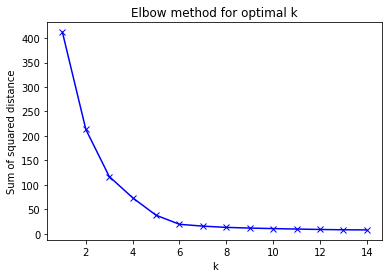

In [52]:
plt.plot(K,Sum_of_squared_distance, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distance')
plt.title('Elbow method for optimal k')
plt.show()

As k increases, the sum of squared distance tends to zero. If we set k to its maximum value n (where n is number of samples) each sample will form its own cluster and hence sum of squared distances equals zero.
In the above plot, elbow at k=5 indicates the optimal k for this dataset.